# Introduction

## This notebook comprises of EDA for the ANL588 Applied Project
## Gaming Disorder: Identification of At-Risk Gamers Through Gamers' Engagement Levels

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


## Data Understanding

In [2]:
# Load dataset

df = pd.read_csv("C:\\Users\\kenye\\OneDrive\\SUSS\\ANL588 Project\\Applied Project\\GamingBehaviorData.csv")

In [3]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [4]:
df.tail()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium
40033,49033,19,Male,USA,Sports,10.083804,0,Easy,13,84,72,39,Medium


In [5]:
df.sample(n=5)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
36233,45233,48,Male,Europe,RPG,5.209907,0,Medium,19,179,80,22,High
28606,37606,45,Female,Europe,Strategy,16.899831,0,Easy,5,88,15,32,Medium
15616,24616,37,Female,Asia,Action,14.338953,0,Easy,0,137,71,33,Low
21251,30251,19,Female,USA,Strategy,5.439306,1,Easy,16,106,52,15,Medium
21328,30328,22,Male,Europe,Strategy,15.128861,0,Easy,11,19,5,30,Low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

### Data Issues Check And Fix
<ol>
    <li><b>Check for Missing Values</b>: Identify any missing values in the dataset and decide on a strategy to handle them (e.g., imputation, removal).</li>
    <li><b>Check for duplicates</b>: Identify duplicates and decide on a strategy to handle them.</li>
    <li><b>Check outliers for numerical Values</b>: Pick up outliers and investigate further.</li>
    <li><b>Check for Inconsistent or Invalid Data</b>: Ensure that categorical data is consistent and valid.</li>
    <li><b>Summary and Cleaning</b>: Apply necessary fixes and summarize the clean dataset.</li>
</ol>

In [7]:
# Detect missing values

df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [8]:
# Identify duplicates

df.duplicated().sum()

0

In [9]:
# Identify outliers for numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerID,40034.0,29016.500000,11556.964675,9000.000000,19008.250000,29016.500000,39024.750000,49033.000000
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


In [10]:
# Checking for inconsistent or invalid data with object datatypes
unique_gender = df['Gender'].unique()
unique_location = df['Location'].unique()
unique_gamegenre= df['GameGenre'].unique()
unique_ingamepurchases = df['InGamePurchases'].unique()
unique_gamedifficulty = df['GameDifficulty'].unique()
unique_engagementlevel = df['EngagementLevel'].unique()

print(unique_gender, unique_location, unique_gamegenre, unique_ingamepurchases,
      unique_gamedifficulty, unique_engagementlevel, sep='\n')

['Male' 'Female']
['Other' 'USA' 'Europe' 'Asia']
['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']
[0 1]
['Medium' 'Easy' 'Hard']
['Medium' 'High' 'Low']


In [11]:
# Convert columns to categorial data types

Categorical_colums = ['Gender','Location','InGamePurchases','GameGenre','GameDifficulty','EngagementLevel']

for column in Categorical_colums:
    df[column] = df[column].astype('category')
    print(df[column].value_counts())
    print('')


# Set up field variables
numerical_fields = ['Age','PlayTimeHours','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked']
categorical_fields = ['Gender','Location','InGamePurchases','GameGenre','GameDifficulty','EngagementLevel']

# Define logical orders for GameDifficulty and EngagementLevel
GameDifficulty_order = ['Easy','Medium','Hard']
EngagementLevel_order = ["Low","Medium","High"]

print(df.dtypes)

Gender
Male      23959
Female    16075
Name: count, dtype: int64

Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

InGamePurchases
0    31993
1     8041
Name: count, dtype: int64

GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

PlayerID                        int64
Age                             int64
Gender                       category
Location                     category
GameGenre                    category
PlayTimeHours                 float64
InGamePurchases              category
GameDifficulty               category
SessionsPerWeek                 int64
AvgSessionDurationMinutes       int64
PlayerLevel                     int64
AchievementsUnlocked            int64


## Part 2: Data Visualisation

### Univariate analysis

C:\Users\kenye\AppData\Local\Temp\ipykernel_20088\2867433454.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 640x480 with 0 Axes>

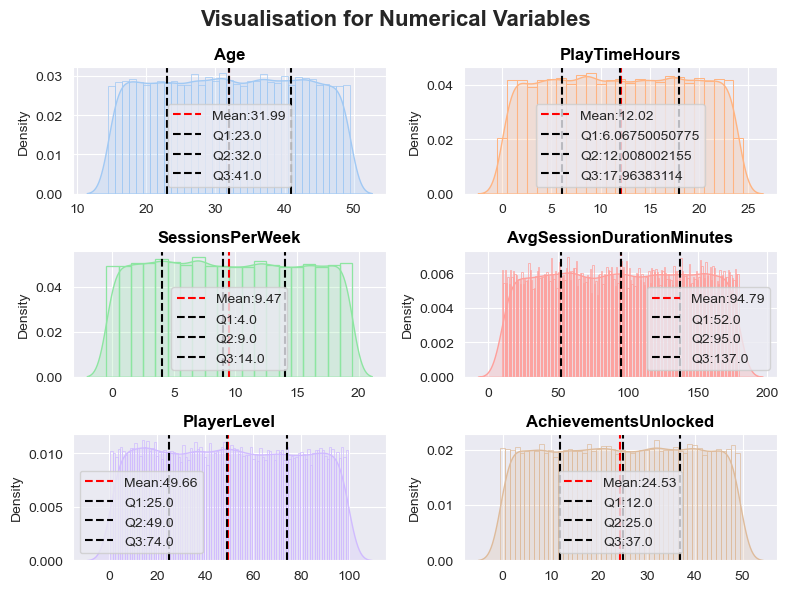

In [12]:
# Visualisations for numerical variables

plt.clf()

sns.set_style("darkgrid")
colors = sns.color_palette(palette = 'pastel', n_colors = len(numerical_fields))

fig,ax = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 6))
ax = ax.flat

# Add a main title for the entire figure
fig.suptitle('Visualisation for Numerical Variables', fontsize=16, fontweight='bold')

for i,col in enumerate(numerical_fields[:len(ax)]):
    
    mu = df[col].mean()
    q1, q2, q3 = df[col].quantile([0.25, 0.5, 0.75])
    sns.histplot(df, x = col, stat = 'density', fill = False, discrete = True, color = colors[i], ax = ax[i])
    sns.kdeplot(df, x = col, color = colors[i], fill = True, ax = ax[i])
    ax[i].axvline(mu, linestyle = '--', color = 'r', label = f"Mean:{mu:.2f}")
    ax[i].axvline(q1, linestyle = '--', color = 'black', label = f"Q1:{q1}")
    ax[i].axvline(q2, linestyle = '--', color = 'black', label = f"Q2:{q2}")
    ax[i].axvline(q3, linestyle = '--', color = 'black', label = f"Q3:{q3}")
    ax[i].legend()
    ax[i].set_xlabel("")
    ax[i].set_title(f"{col}",fontweight = 'bold', color = 'black')
    
fig.tight_layout()
fig.show()


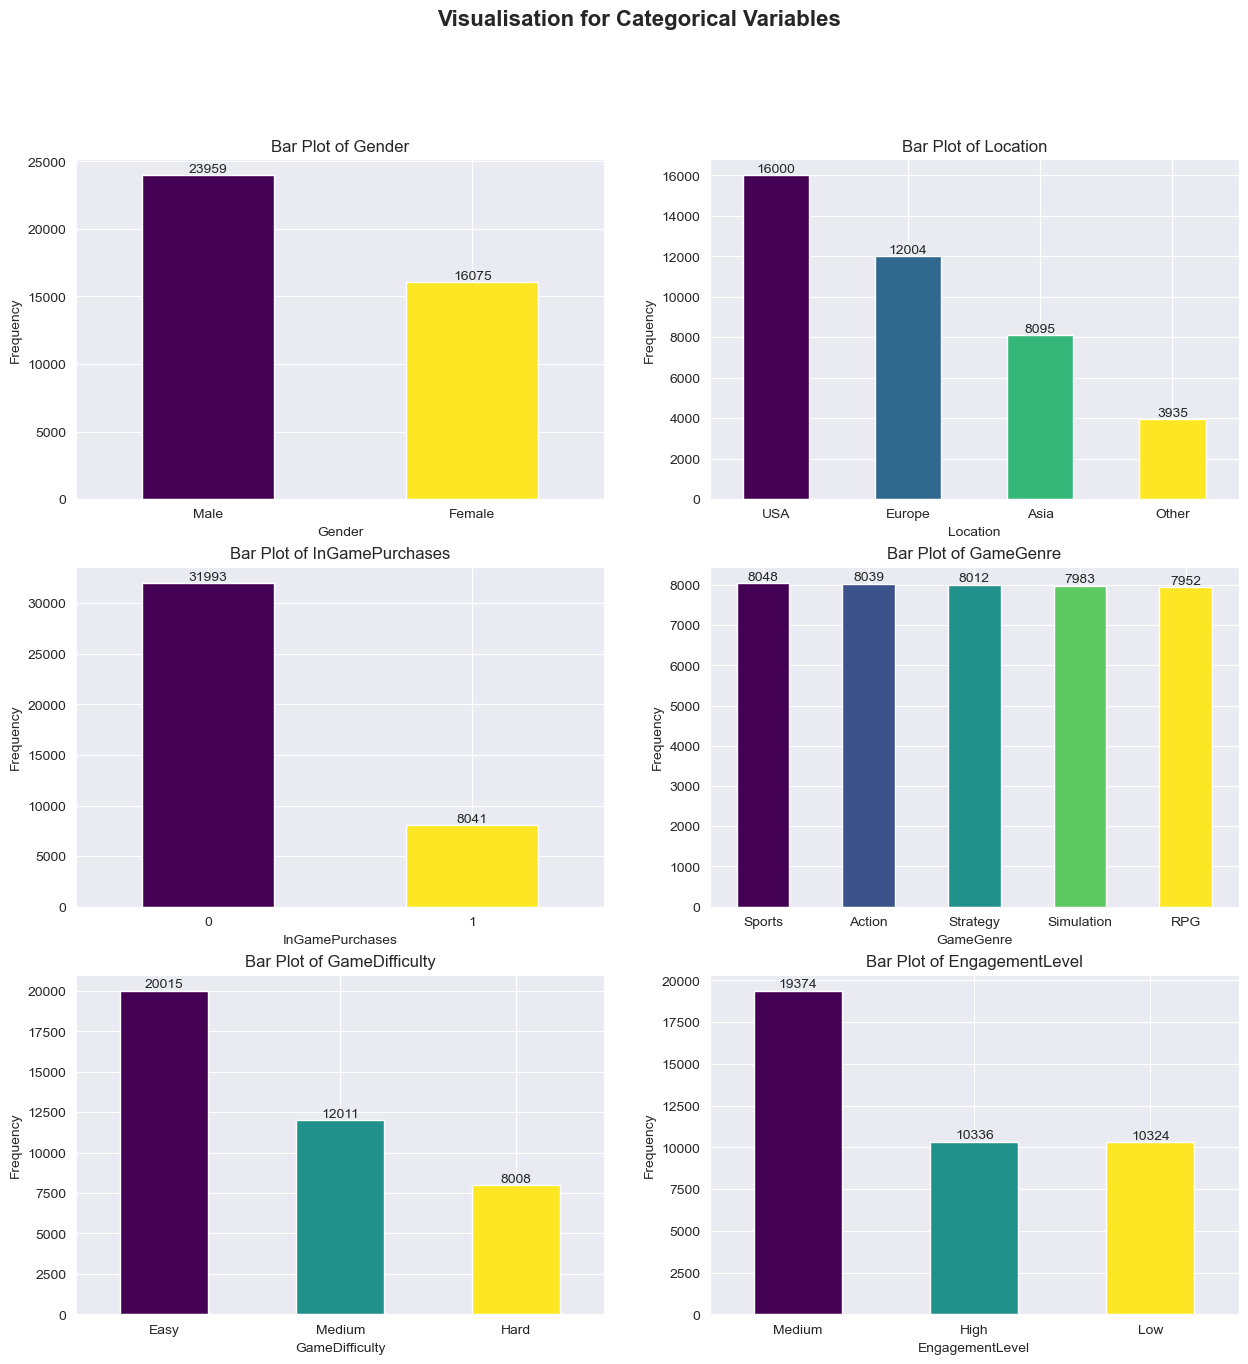

In [13]:
# Visualisations for Categorical variables

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax = ax.flat

# Add a main title for the entire figure
fig.suptitle('Visualisation for Categorical Variables', fontsize=16, fontweight='bold')

# Plot charts for categorical fields
for i in range(len(categorical_fields)):
    field = categorical_fields[i]
    counts = df[field].value_counts()

    # Create a color map (you can customize these colors)
    colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))

    # Create the bar plot with coloured bars
    counts.plot(kind='bar', ax=ax[i], color = colors)

    # Display the value of each variable on the bars
    for j in range(len(counts)):
        ax[i].text(j, counts.iloc[j], counts.iloc[j], ha='center', va='bottom')

    ax[i].set_title(f'Bar Plot of {field}')
    ax[i].set_xlabel(field)
    ax[i].set_ylabel('Frequency')
    ax[i].tick_params(axis='x', rotation=0)
    ax[i].grid(True)



### Bivariate analysis

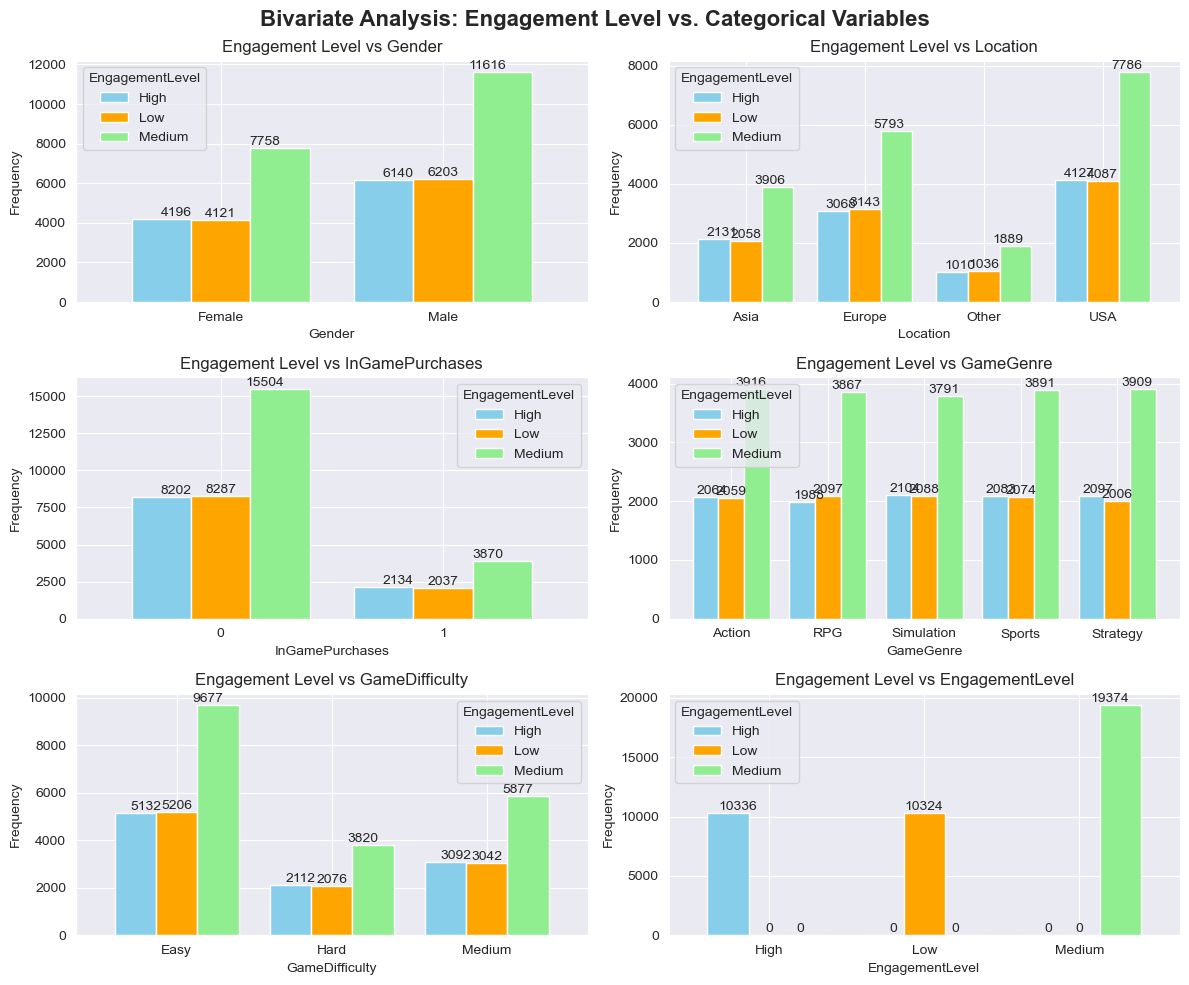

In [14]:
# Box plots for Engagement Levels against categorical variables

# Create a 2x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Add a main title for the entire figure
fig.suptitle('Bivariate Analysis: Engagement Level vs. Categorical Variables', fontsize=16, fontweight='bold')

# Loop through each categorical field to create bar plots for Engagement Level
for i, field in enumerate(categorical_fields):
    # Create a cross-tabulation of Engagement Level vs. the categorical field
    counts = pd.crosstab(df[field], df['EngagementLevel'])
    
    # Create the bar plot with side-by-side bars
    counts.plot(kind='bar', ax=axs[i], color=['skyblue', 'orange', 'lightgreen'], width=0.8)

    # Add labels and title
    axs[i].set_title(f'Engagement Level vs {field}')
    axs[i].set_xlabel(field)
    axs[i].set_ylabel('Frequency')
    
    # Set correct x-tick labels (categories)
    axs[i].set_xticks(range(len(counts.index)))  # Set tick positions
    axs[i].set_xticklabels(counts.index.tolist(), rotation=0)  # Set tick labels to category names

    # Display the value of each variable on the bars
    for j in range(len(counts)):
        for k in range(len(counts.columns)):
            axs[i].text(j + (k * 0.2) - 0.2, counts.iloc[j, k] + 0.1, 
                         counts.iloc[j, k], ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


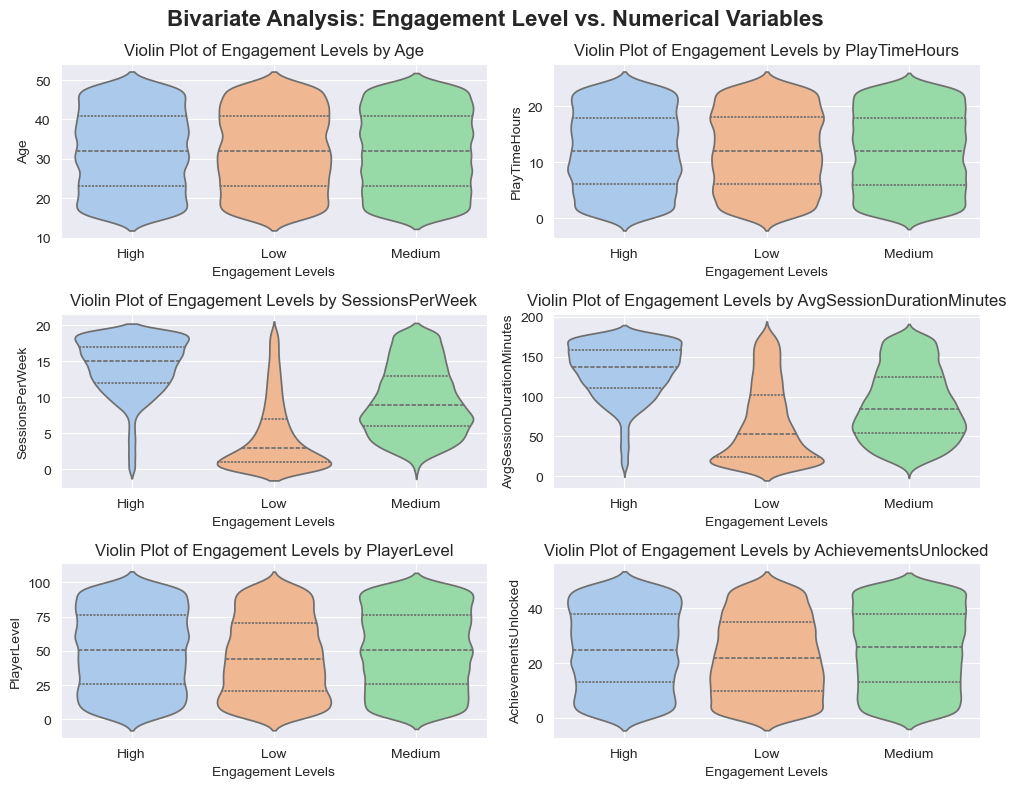

In [15]:
# Bivariate plots for Engagement Levels against numerical fields

# Create a grid of subplots (3 rows and 2 columns)
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
ax = ax.flat # Flatten the array of axes for easy iteration

# Add a main title for the entire figure
fig.suptitle('Bivariate Analysis: Engagement Level vs. Numerical Variables', fontsize=16, fontweight='bold')

# Violin plots for Engagement Level against numerical fields
for i in range(len(numerical_fields)):
    cat = numerical_fields[i]
    
    # Create a violin plot
    sns.violinplot(x='EngagementLevel', y=cat,
                   data=df,
                   inner='quartile',   # Show quartiles inside the violins
                   palette='pastel',
                   hue='EngagementLevel',
                   legend=False,
                   ax=ax[i])           # Specify the current axis
    
    ax[i].set_title(f'Violin Plot of Engagement Levels by {cat}')
    ax[i].set_xlabel('Engagement Levels')
    ax[i].set_ylabel(cat)
    ax[i].tick_params(axis='x', rotation=0) # Set x-tick labels to horizontal
    ax[i].grid(True)

# Hide any unused subplots (if there are fewer plots than subplots)
for j in range(len(numerical_fields), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

C:\Users\kenye\AppData\Local\Temp\ipykernel_20088\3508857331.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EngagementLevel'] = df['EngagementLevel'].replace({"Low": 0, "Medium": 1, "High": 2})
C:\Users\kenye\AppData\Local\Temp\ipykernel_20088\3508857331.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['EngagementLevel'] = df['EngagementLevel'].replace({"Low": 0, "Medium": 1, "High": 2})


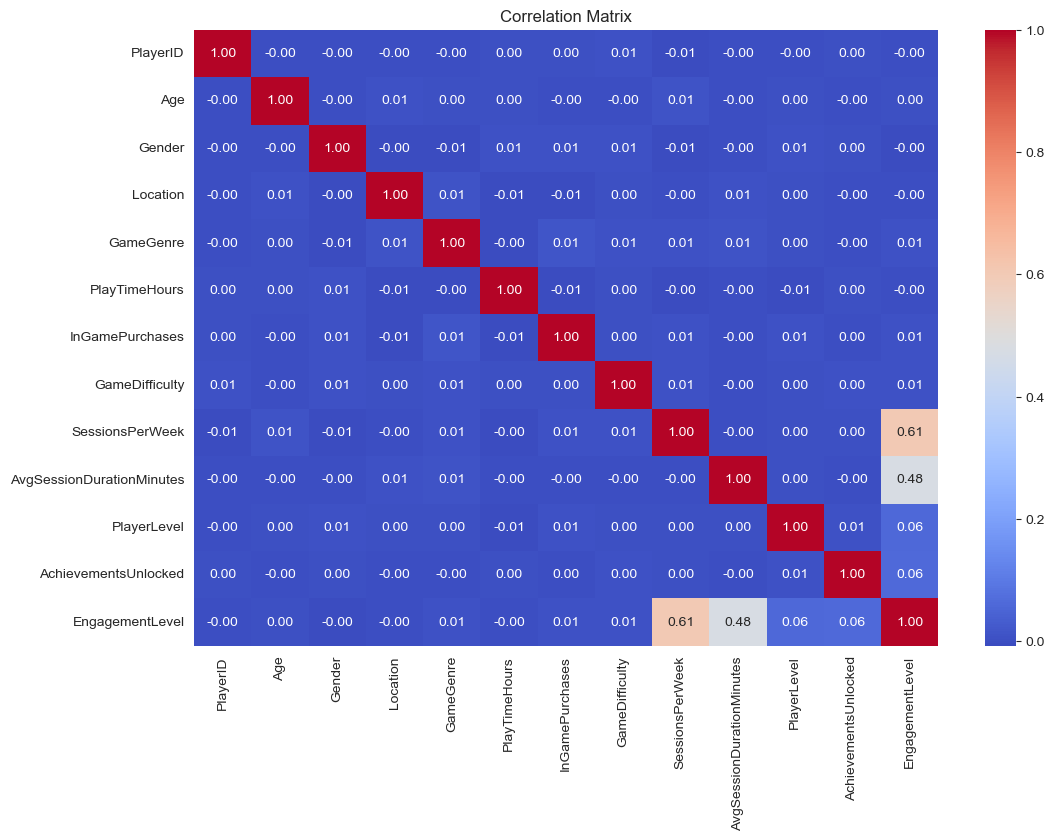

In [16]:
# Correlation matrix

# Hard encode Engagement Level
df['EngagementLevel'] = df['EngagementLevel'].replace({"Low": 0, "Medium": 1, "High": 2})

# Encode categorial field with numerical values
label_encoders = {}
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

# Encode via looping categorial field
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Plot correlation matrix
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


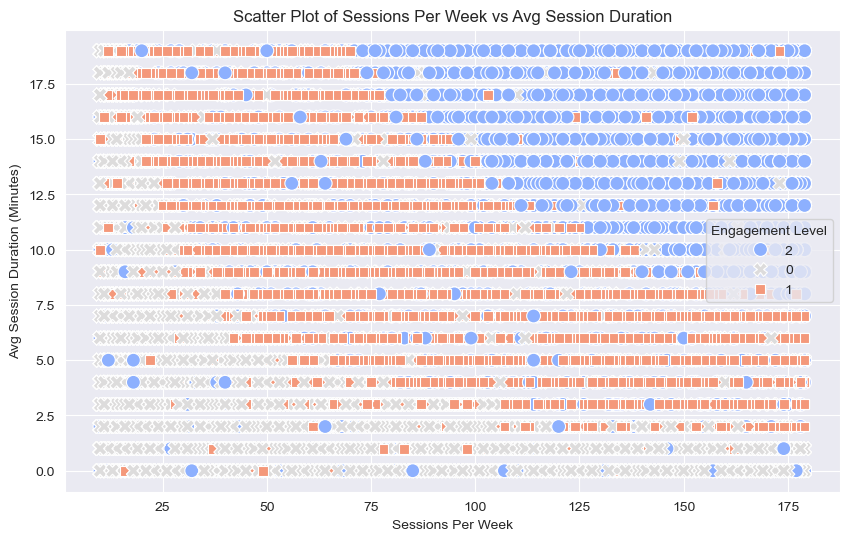

In [17]:
# Multivariate analysis on highly correlated features

# Create a scatter plot matrix
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AvgSessionDurationMinutes', y='SessionsPerWeek', hue='EngagementLevel', palette='coolwarm', style='EngagementLevel', s=100)
plt.title('Scatter Plot of Sessions Per Week vs Avg Session Duration')
plt.xlabel('Sessions Per Week')
plt.ylabel('Avg Session Duration (Minutes)')
plt.legend(title='Engagement Level')
plt.show()